# Финальная работа

### Выполнил Кузнецов С.И.

In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

### 1. Загрузить файл hr.csv.

In [2]:
hr = pd.read_csv('HR.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### 2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [3]:
# Рассчитаем статистики для всех числовых переменных
hr_desc = hr.describe()
hr_desc

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [4]:
# Среднее
hr_desc.loc['mean']

satisfaction_level         0.612834
last_evaluation            0.716102
number_project             3.803054
average_montly_hours     201.050337
time_spend_company         3.498233
Work_accident              0.144610
left                       0.238083
promotion_last_5years      0.021268
Name: mean, dtype: float64

In [5]:
# Медиана
hr_desc.loc['50%']

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
Name: 50%, dtype: float64

In [6]:
# Минимум
hr_desc.loc['min']

satisfaction_level        0.09
last_evaluation           0.36
number_project            2.00
average_montly_hours     96.00
time_spend_company        2.00
Work_accident             0.00
left                      0.00
promotion_last_5years     0.00
Name: min, dtype: float64

In [7]:
# Максимум
hr_desc.loc['max']

satisfaction_level         1.0
last_evaluation            1.0
number_project             7.0
average_montly_hours     310.0
time_spend_company        10.0
Work_accident              1.0
left                       1.0
promotion_last_5years      1.0
Name: max, dtype: float64

In [8]:
# сред. отклонение
hr_desc.loc['std']

satisfaction_level        0.248631
last_evaluation           0.171169
number_project            1.232592
average_montly_hours     49.943099
time_spend_company        1.460136
Work_accident             0.351719
left                      0.425924
promotion_last_5years     0.144281
Name: std, dtype: float64

### 3. Рассчитать и визуализировать корреляционную матрицу для переменных.

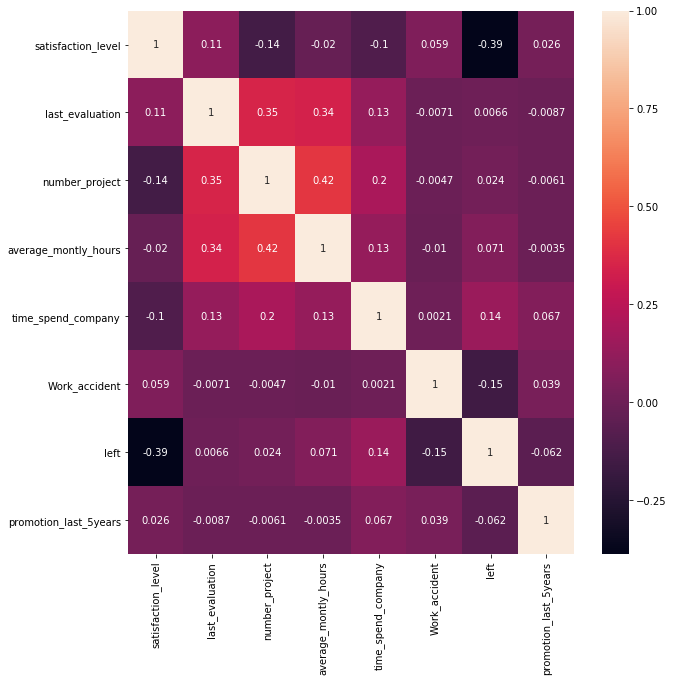

In [9]:
corr = hr.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

**Вывод:** 
- Лучше всего коррелируют величины average_montly_hours и number_project
- Хуже всего всего коррелируют величины Work_accident и number_project

### 4. Визуализировать несколько взаимосвязей между переменными.

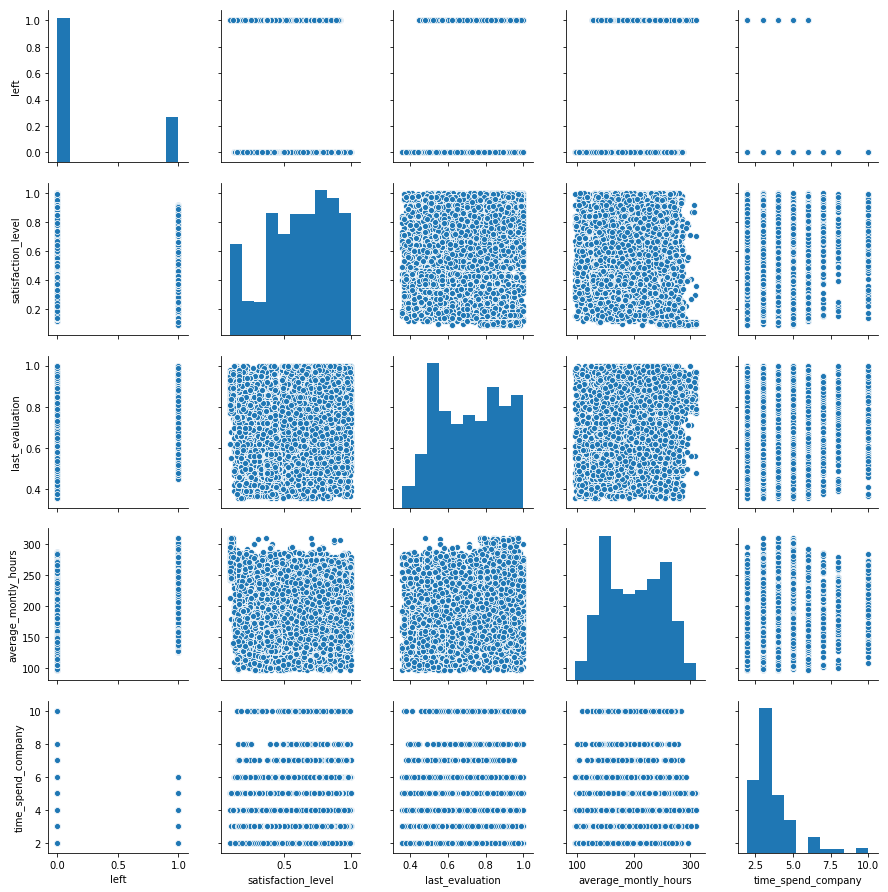

In [10]:
sns.pairplot(data = hr, 
             vars = ['left', 
                     'satisfaction_level', 
                     'last_evaluation', 
                     'average_montly_hours', 
                     'time_spend_company'
                    ]
            )

**Вывод:** Видно, что переменные практически не зависят друг от друга

### 5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

- Проверим гипотезу, что сотрудники с низкой ЗП так же удовлетворены работой, как сотрудники с высокой ЗП.

In [11]:
# Статистика

print('Средний уровень удовлетворенности сотрудников с низкой ЗП: {:.4f}'.
      format(hr[hr.salary == 'low'].satisfaction_level.mean()))
print('Средний уровень удовлетворенности других сотрудников: {:.4f}'.
      format(hr[hr.salary != 'low'].satisfaction_level.mean()))

Средний уровень удовлетворенности сотрудников с низкой ЗП: 0.6008
Средний уровень удовлетворенности других сотрудников: 0.6243


In [12]:
# T-тест:
# H_0 - средний уровень удовлетворенности сотрудников с низкой ЗП такой же, как и остальных
# H_1 - средний уровень удовлетворенности сотрудников с низкой ЗП ниже, чем остальных
stats.ttest_ind(hr[hr.salary == 'low'].satisfaction_level, hr[hr.salary != 'low'].satisfaction_level)

Ttest_indResult(statistic=-5.81303188427904, pvalue=6.2598139677876395e-09)

**Вывод:** Принимаем гипотезу, что сотрудники с низкой ЗП меньше удовлетворены работой, чем сотрудники с высокой ЗП.

- Проверим гипотезу, что уровень удовлетворенности сотрудников департамента hr такой же, как и сотрудников других департаментов.

In [13]:
# Статистика

print('Средний уровень удовлетворенности сотрудников департамента hr: {:.4f}'.
      format(hr[hr.sales == 'hr'].satisfaction_level.mean()))
print('Средний уровень удовлетворенности сотрудников других департаментов: {:.4f}'.
      format(hr[hr.sales != 'hr'].satisfaction_level.mean()))

Средний уровень удовлетворенности сотрудников департамента hr: 0.5988
Средний уровень удовлетворенности сотрудников других департаментов: 0.6136


In [14]:
# T-тест:
# H_0 - средний уровень удовлетворенности сотрудников департамента hr такой же, как и остальных
# H_1 - средний уровень удовлетворенности сотрудников департамента hr ниже, чем остальных
stats.ttest_ind(hr[hr.sales == 'hr'].satisfaction_level, hr[hr.sales != 'hr'].satisfaction_level)

Ttest_indResult(statistic=-1.5726863016810089, pvalue=0.11581256833709447)

**Вывод:** Нет оснований отвергать гипотезу, что средний уровень удовлетворенности сотрудников департамента hr такой же, как и сотрудников других департаментов

- Проверим гипотезу, что доля несчастных случаев среди сотрудников департамента hr такая же, как в остальных департаментах.

In [15]:
# Статистика

print('Доля несчастных случаев среди сотрудников департамента hr: {:.4%}'.
      format(hr[hr.sales == 'hr'].Work_accident.mean()))
print('Доля несчастных случаев среди сотрудников других департаментов: {:.4%}'.
      format(hr[hr.sales != 'hr'].Work_accident.mean()))

Доля несчастных случаев среди сотрудников департамента hr: 12.0433%
Доля несчастных случаев среди сотрудников других департаментов: 14.5863%


In [16]:
# T-тест:
# H_0 - доля несчастных случаев среди сотрудников департамента hr такая же, как и в остальных департаментах
# H_1 - доля несчастных случаев среди сотрудников департамента hr ниже, чем в остальных департаментах
stats.ttest_ind(hr[hr.sales == 'hr'].Work_accident, hr[hr.sales != 'hr'].Work_accident)

Ttest_indResult(statistic=-1.9166052527051984, pvalue=0.05530708404109761)

**Вывод:** Нет оснований отвергать гипотезу, что доля несчастных случаев среди сотрудников департамента hr такая же, как в остальных департаментах.

### 6. Рассчитать сколько работников работает в каждом департаменте.

In [17]:
# Количество сотрудников в разрезе департаментов

hr.groupby('sales').agg({'sales': 'count'}).sort_values('sales', ascending = False)

/home/sergmath/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 'sales' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


,sales
sales,
sales,4140
technical,2720
support,2229
IT,1227
product_mng,902
marketing,858
RandD,787
accounting,767
hr,739


### 7. Показать распределение сотрудников по зарплатам.

In [18]:
num_of_employers = hr.shape[0]
salary_stats = hr.groupby('salary').agg({'salary': 'count'})

print('Распределение сотрудников по уровню ЗП:')
salary_stats['salary'].apply(lambda x : x / num_of_employers)

Распределение сотрудников по уровню ЗП:


salary
high      0.082472
low       0.487766
medium    0.429762
Name: salary, dtype: float64

### 8. Показать распределение сотрудников по зарплатам совместно с департаментами.

In [19]:
hr_pivot = hr.pivot_table(index = 'sales', 
                          columns = 'salary', 
                          values = 'number_project', 
                          aggfunc = 'count', 
                          fill_value = 0)

hr_pivot['high_by_department'] = hr_pivot.apply(lambda x: x['high'] / x.sum(), axis = 1)
hr_pivot['medium_by_department'] = hr_pivot.apply(lambda x: x['medium'] / x.sum(), axis = 1)
hr_pivot['low_by_department'] = hr_pivot.apply(lambda x: x['low'] / x.sum(), axis = 1)
hr_pivot

salary,high,low,medium,high_by_department,medium_by_department,low_by_department
sales,,,,,,
IT,83,609,535,0.067645,0.435999,0.496129
RandD,51,364,372,0.064803,0.472642,0.462200
accounting,74,358,335,0.096480,0.436712,0.466429
hr,45,335,359,0.060893,0.485752,0.452980
management,225,180,225,0.357143,0.356941,0.285391
marketing,80,402,376,0.093240,0.438181,0.468241
product_mng,68,451,383,0.075388,0.424576,0.499723
sales,269,2099,1772,0.064976,0.428013,0.506944
support,141,1146,942,0.063257,0.422599,0.514020


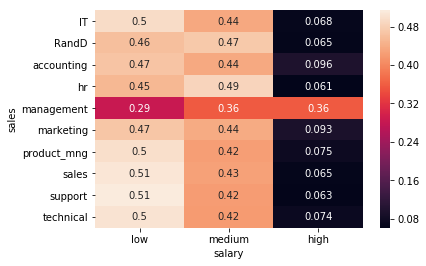

In [20]:
hr_salary_dep = hr_pivot[['low_by_department', 'medium_by_department', 'high_by_department']]

sns.heatmap(hr_salary_dep, 
            annot=True, 
            xticklabels=['low', 'medium', 'high'], 
            yticklabels=hr_salary_dep.index.values)

**Вывод:** видно, что в департаменте управления зарплаты существенно выше, чем в среднем по компании.

### 9. Сколько сотрудников покинули компанию.

In [21]:
left_employers = hr.left.sum()

print('Компанию покинули {} сотрудников, что составляет {:.2%} от общего числа'
      .format(left_employers, left_employers / num_of_employers))


Компанию покинули 3571 сотрудников, что составляет 23.81% от общего числа


#### Для того, чтобы найти причины увольнения сотрудников из компании построим распределение количества увольнений в разных разрезах

In [22]:
# В разрезе ЗП
hr_salary_stats = hr.groupby('salary').agg({'left': ['count', 'mean']})
hr_salary_stats

left          
       count      mean
salary                
high    1237  0.066289
low     7316  0.296884
medium  6446  0.204313

In [23]:
# В разрезе департаментов
hr_department_stats = hr.groupby('sales').agg({'left': ['count', 'mean']})
hr_department_stats

left          
            count      mean
sales                      
IT           1227  0.222494
RandD         787  0.153748
accounting    767  0.265971
hr            739  0.290934
management    630  0.144444
marketing     858  0.236597
product_mng   902  0.219512
sales        4140  0.244928
support      2229  0.248991
technical    2720  0.256250

In [24]:
# В разрезе несчастных случаев
hr.groupby('Work_accident').agg({'left': ['count', 'mean']})

left          
               count      mean
Work_accident                 
0              12830  0.265160
1               2169  0.077916

In [25]:
# В разрезе количества проектов
hr.groupby('number_project').agg({'left': ['count', 'mean']})

left          
               count      mean
number_project                
2               2388  0.656198
3               4055  0.017756
4               4365  0.093700
5               2761  0.221659
6               1174  0.557922
7                256  1.000000

In [26]:
# В разрезе продвижения
hr.groupby('promotion_last_5years').agg({'left': ['count', 'mean']})

left          
                       count      mean
promotion_last_5years                 
0                      14680  0.241962
1                        319  0.059561

In [27]:
# В разрезе стажа работы в данной компании
hr_time_spend_stats = hr.groupby('time_spend_company').agg({'left': ['count', 'mean']})
hr_time_spend_stats

left          
                   count      mean
time_spend_company                
2                   3244  0.016338
3                   6443  0.246159
4                   2557  0.348064
5                   1473  0.565513
6                    718  0.291086
7                    188  0.000000
8                    162  0.000000
10                   214  0.000000

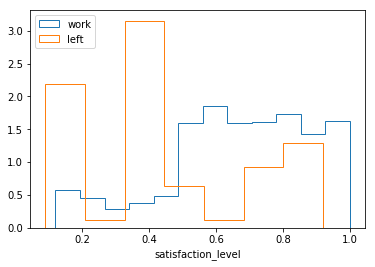

In [28]:
# построим распределения непрерывных величин для работающих и неработающих сотрудников

hr_work = hr[hr.left == 0]
hr_left = hr[hr.left == 1]

#satisfaction_level
plt.hist(hr_work.satisfaction_level, bins = 12, density=True, histtype =  'step', label = 'work')
plt.hist(hr_left.satisfaction_level, bins = 7, density=True, histtype =  'step', label = 'left')

plt.xlabel('satisfaction_level')
plt.legend(loc='upper left')

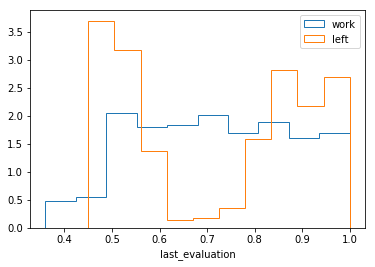

In [29]:
#last_evaluation
plt.hist(hr_work.last_evaluation, density=True, histtype =  'step', label = 'work')
plt.hist(hr_left.last_evaluation, density=True, histtype =  'step', label = 'left')

plt.xlabel('last_evaluation')
plt.legend(loc='upper right')

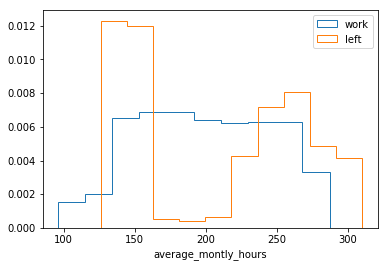

In [30]:
#average_montly_hours

plt.hist(hr_work.average_montly_hours, density=True, histtype =  'step',bins = 10, label = 'work')
plt.hist(hr_left.average_montly_hours, density=True, histtype =  'step',bins = 10, label = 'left')

plt.xlabel('average_montly_hours')
plt.legend(loc='upper right')


### 10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

- Проверим гипотезу, что компанию покидают сотрудники с низкой ЗП

In [31]:
# Статистика:
hr_salary_stats

left          
       count      mean
salary                
high    1237  0.066289
low     7316  0.296884
medium  6446  0.204313

In [32]:
# T-тест:
# H_0 - доля уволившихся сотрудников с низкой ЗП такая же, как и в среднем по компании
# H_1 - доля уволившихся сотрудников с низкой ЗП выше, чем в среднем по компании
stats.ttest_ind(hr[hr.salary == 'low'].left, hr.left)

Ttest_indResult(statistic=9.450227048367632, pvalue=3.7034768845844164e-21)

Есть основание принять гипотезу $H_1$

In [33]:
# T-тест:
# H_0 - доля уволившихся сотрудников со средней ЗП такая же, как и в среднем по компании
# H_1 - доля уволившихся сотрудников со средней ЗП ниже, чем в среднем по компании
stats.ttest_ind(hr[hr.salary == 'medium'].left, hr.left)

Ttest_indResult(statistic=-5.408626709052767, pvalue=6.418923273466537e-08)

Есть основание принять гипотезу $H_1$

In [34]:
# T-тест:
# H_0 - доля уволившихся сотрудников с высокой ЗП такая же, как и в среднем по компании
# H_1 - доля уволившихся сотрудников с высокой ЗП ниже, чем в среднем по компании
stats.ttest_ind(hr[hr.salary == 'high'].left, hr[hr.salary != 'high'].left)

Ttest_indResult(statistic=-14.918780298656008, pvalue=5.677176942019767e-50)

Есть основание принять гипотезу $H_1$

**Вывод:** Одна из возможных причин увольнения сотрудников - низкая зарплата.

- Компанию покидают сотрудники с уровнем удовлетворенности (satisfaction_level) ниже 0.5

In [35]:
# Статистика
hr['satisfaction_level_category'] = hr.apply(lambda x: 
                                             'less 0.5' if x['satisfaction_level'] < 0.5 else 'more 0.5',
                                             axis = 1)


hr.groupby('satisfaction_level_category').agg({'left': ['count', 'mean']})

left         
                             count     mean
satisfaction_level_category                
less 0.5                      4583  0.55575
more 0.5                     10416  0.09831

In [36]:
# T-тест:
# H_0 - доля уволившихся сотрудников с низким уровнем удовлетворенности такая же, как и в среднем по компании
# H_1 - доля уволившихся сотрудников с низким уровнем удовлетворенности, выше чем в среднем по компании
stats.ttest_ind(hr[hr.satisfaction_level_category == 'less 0.5'].left, hr.left)

Ttest_indResult(statistic=42.432162467924584, pvalue=0.0)

Есть основание принять гипотезу $H_1$

In [37]:
# T-тест:
# H_0 - доля уволившихся сотрудников с высоким уровнем удовлетворенности такая же, как и в среднем по компании
# H_1 - доля уволившихся сотрудников с высоким уровнем удовлетворенности, выше чем в среднем по компании
stats.ttest_ind(hr[hr.satisfaction_level_category == 'more 0.5'].left, hr.left)

Ttest_indResult(statistic=-28.939306384403604, pvalue=3.326954008188494e-181)

Есть основание принять гипотезу $H_1$

**Вывод:** Другая возможная причина увольнения сотрудников - низкий уровень удовлетворенности сотрудников.

- Проверим гипотезу о том, что чаще всего увольняются сотрудники отдельных департаментов.

In [38]:
# Статситика
hr_department_stats

left          
            count      mean
sales                      
IT           1227  0.222494
RandD         787  0.153748
accounting    767  0.265971
hr            739  0.290934
management    630  0.144444
marketing     858  0.236597
product_mng   902  0.219512
sales        4140  0.244928
support      2229  0.248991
technical    2720  0.256250

In [39]:
# проверим гипотезу, что сотрудники HR-департамента увольняются чаще других
# H_0 - доля уволившихся сотрудников такая же, как в других отделах
# H_1 - доля уволившихся сотрудников выше, чем в других отделах
stats.ttest_ind(hr[hr.sales == 'hr'].left, hr[hr.sales != 'hr'].left)


Ttest_indResult(statistic=3.4607860604095313, pvalue=0.0005400997397914711)

Есть основание принять гипотезу $H_1$

In [40]:
# проверим гипотезу, что сотрудники accounting-департамента увольняются чаще других
# H_0 - доля уволившихся сотрудников такая же, как в других отделах
# H_1 - доля уволившихся сотрудников выше, чем в других отделах
stats.ttest_ind(hr[hr.sales == 'accounting'].left, hr[hr.sales != 'accounting'].left)

Ttest_indResult(statistic=1.8617820653874604, pvalue=0.06265336195730918)

Нет оснований отклонять гипотезу $H_0$

In [41]:
# проверим гипотезу, что сотрудники technical-департамента увольняются чаще других
# H_0 - доля уволившихся сотрудников такая же, как в других отделах
# H_1 - доля уволившихся сотрудников выше, чем в других отделах
stats.ttest_ind(hr[hr.sales == 'technical'].left, hr[hr.sales != 'technical'].left)

Ttest_indResult(statistic=2.4590603742993635, pvalue=0.013941329513559619)

Нет оснований отклонять гипотезу $H_0$

In [42]:
# проверим гипотезу, что сотрудники support-департамента увольняются чаще других
# H_0 - доля уволившихся сотрудников такая же, как в других отделах
# H_1 - доля уволившихся сотрудников выше, чем в других отделах
stats.ttest_ind(hr[hr.sales == 'support'].left, hr[hr.sales != 'support'].left)

Ttest_indResult(statistic=1.3104354299335008, pvalue=0.19006864310449267)

Нет оснований отклонять гипотезу $H_0$

**Вывод:** Можно с уверенностью сказать, что сотрудники HR-департамента увольняются чаще других. Возможно, причину стоит искать в самом HR-департаменте.

- Проверим гипотезу о том, что чаще всего увольняются сотрудники, проработавшие в компании 4-6 лет.

In [43]:
# Статистика
hr_time_spend_stats

left          
                   count      mean
time_spend_company                
2                   3244  0.016338
3                   6443  0.246159
4                   2557  0.348064
5                   1473  0.565513
6                    718  0.291086
7                    188  0.000000
8                    162  0.000000
10                   214  0.000000

In [44]:
# Проверим гипотезу, что сотрудники проработавшие от 4 до 6 лет увольняются чаще других
# H_0 - доля уволившихся сотрудников такая же, как и среди остальных сотрудников
# H_1 - доля уволившихся сотрудников выше, чем среди остальных сотрудников
stats.ttest_ind(hr[(hr.time_spend_company >= 4) & (hr.time_spend_company <= 6)].left,
                hr[(hr.time_spend_company < 4) | (hr.time_spend_company > 6)].left)

Ttest_indResult(statistic=34.30857330848544, pvalue=2.080600781849309e-248)

Есть основание принять гипотезу $H_1$

**Вывод:** Возможно, за 4-6 лет сотрудникам надоедает работать на одном месте и они увольняются.